In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)


In [11]:
df  = pd.DataFrame(X,columns = ['Feature_1','Feature_2'])

In [12]:
df

,Feature_1,Feature_2
0,-8.148764,6.901617
1,-8.497759,-6.912687
2,5.953761,1.488191
3,-2.744463,8.136177
4,-6.158899,-7.124955
...,...,...
495,-7.998714,7.878303
496,-2.555459,9.218977
497,-7.081098,-5.878697
498,-7.193261,-6.250704


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
inertia = [] #wcss within clusters sum of squares
k_range = range(1, 10)


In [15]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [16]:
inertia

[999.9999999999991,
 546.5846235701698,
 102.86282066086986,
 10.602257105672479,
 9.788532453328468,
 8.609530283250395,
 7.64345505619612,
 6.609413246919947,
 6.211509253893227]

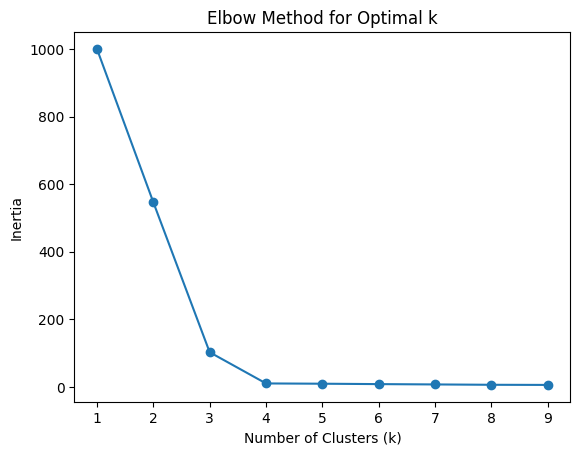

In [18]:
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [25]:
kmeans_final = KMeans(n_clusters=4, random_state=42)
kmeans_final.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [26]:
cluster_labels = kmeans_final.labels_

In [27]:
cluster_labels

array([1, 2, 0, 3, 2, 2, 1, 2, 0, 2, 0, 3, 0, 3, 2, 0, 3, 1, 1, 3, 0, 3,
       0, 1, 1, 2, 2, 1, 1, 3, 2, 3, 3, 3, 2, 2, 0, 0, 1, 1, 2, 0, 3, 3,
       3, 0, 0, 0, 2, 1, 2, 3, 1, 2, 0, 3, 3, 1, 2, 1, 1, 3, 2, 1, 0, 2,
       2, 1, 0, 2, 0, 2, 2, 1, 3, 1, 3, 2, 0, 3, 2, 0, 2, 3, 1, 1, 1, 1,
       0, 3, 1, 2, 0, 2, 0, 1, 3, 0, 3, 1, 0, 0, 0, 1, 1, 3, 3, 1, 3, 1,
       2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 3, 0, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 3, 3, 3, 2, 2, 0, 0,
       3, 1, 3, 1, 2, 2, 1, 1, 0, 0, 2, 3, 0, 2, 1, 1, 2, 3, 3, 1, 1, 3,
       3, 2, 2, 2, 3, 1, 3, 3, 1, 1, 3, 0, 3, 2, 2, 1, 1, 2, 3, 2, 3, 3,
       1, 2, 3, 3, 2, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 3, 3, 2, 3, 1, 3, 0,
       0, 3, 1, 3, 0, 3, 3, 2, 2, 0, 2, 0, 3, 2, 1, 2, 3, 2, 0, 0, 0, 2,
       3, 0, 1, 1, 0, 3, 3, 2, 3, 3, 3, 3, 0, 0, 1, 3, 2, 0, 3, 3, 1, 3,
       2, 2, 0, 3, 0, 2, 3, 3, 0, 1, 3, 3, 3, 0, 1, 2, 3, 0, 0, 3, 2, 3,
       0, 1, 0, 2, 2, 3, 3, 0, 1, 0, 1, 0, 2, 0, 2,

In [28]:
df['cluster'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

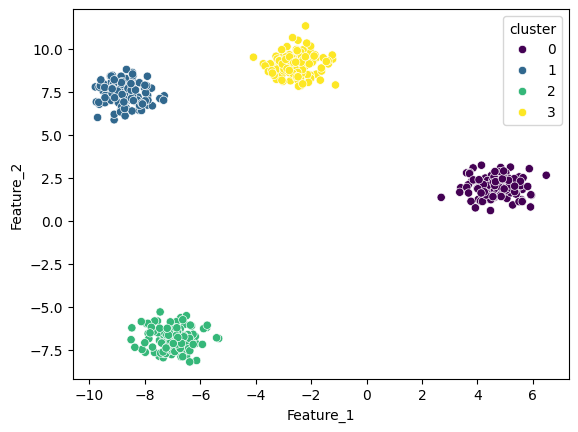

In [29]:
sns.scatterplot(
    data=df,
    x='Feature_1',
    y='Feature_2',
    hue='cluster',
    palette='viridis'
)